In [59]:
import bruno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [60]:
### inicianlizando os vetores X, Y
X = np.array([-1,0,1,2]).T
Y = np.array([1,-1,0,2]).T

<Axes: >

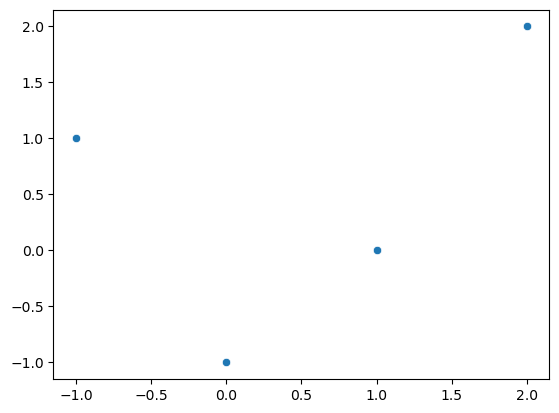

In [61]:
sb.scatterplot(x=X, y=Y)

### Calculando os minimos quadrados para um modelo de uma reta $y = \alpha x + \beta$

In [62]:
A = bruno.straight_line_matrix(X) # desenha a matriz de sensitividade
A

array([[-1,  1],
       [ 0,  1],
       [ 1,  1],
       [ 2,  1]])

In [63]:
p, incertezas = bruno.minimos_quadrados(A, Y, inc=True)

In [64]:
x_mod = np.linspace(int(np.min(X))-1, int(np.max(X))+1, 100)

In [65]:
y_mod = p[0]*x_mod + p[1]

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

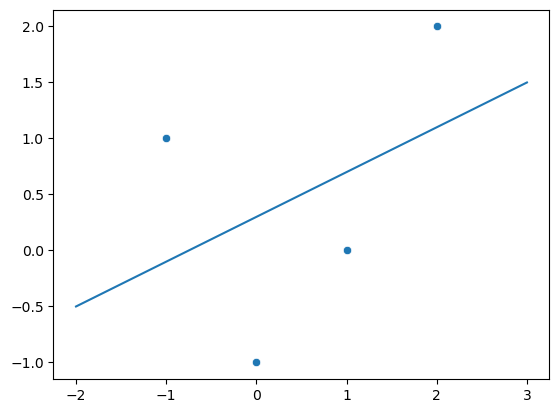

In [66]:
sb.scatterplot(x=X, y=Y)
sb.lineplot(x= x_mod, y =y_mod)

In [67]:
bruno.erro_padrao_e_intervalo(incertezas)[0]

array([0.74535599, 0.91287093])

#### Vamos tentar ajustar a uma parabola $\vec{p} = [a, b, c]$ e o modelo é $ax^2 + bx +c$

In [68]:
X2 = X**2

In [69]:
A2  = np.vstack([X2, A.T]).T

In [70]:
p2, inc2 = bruno.minimos_quadrados(A2, Y, inc=True)

In [71]:
y2  = p2[0]*x_mod**2 + p2[1]*x_mod + p2[2]

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Axes: >

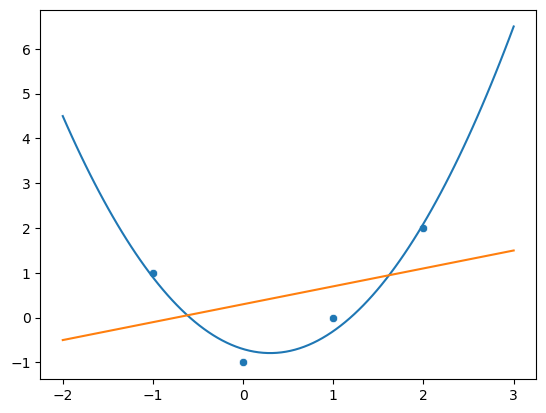

In [103]:
sb.scatterplot(x=X, y=Y)
sb.lineplot(x= x_mod, y =y2)
sb.lineplot(x= x_mod, y =y_mod)

In [73]:
err2 = bruno.erro_padrao_e_intervalo(inc2)[0]
err1 = bruno.erro_padrao_e_intervalo(incertezas)[0]

In [74]:
p2

array([ 1. , -0.6, -0.7])

In [75]:
bruno.residuo(A, x_min=p, d = Y)[1] # residuo de p [a, b] modelo da reta

2.04939015319192

In [77]:
bruno.residuo(A2, x_min=p2, d = Y)[1] #residuo de p [a, b, c] para o modelo da parabola

0.447213595499958

In [80]:
intervalo_de_confianca_parabola = bruno.erro_padrao_e_intervalo(inc2)[1]
intervalo_de_confianca_parabola

array([[-1.63333333,  1.63333333],
       [-2.19134662,  2.19134662],
       [-2.42262484,  2.42262484]])

In [88]:
err2 #erro padrao da parabola

array([0.83333333, 1.11803399, 1.23603308])

## Calculando o coeficiente de determinação da parábola

In [93]:
y_pred = p2[0]*X**2 + p2[1]*X + p2[2]

In [96]:
bruno.coeficiente_determinacao(Y, y_pred) # R2: 0,96 é um ótimo ajuste

0.96

In [100]:
# Podemos calcular o r2 da reta e ver quem mais se aproxima de 1
y0_pred = p[0]*X + p[1]
bruno.coeficiente_determinacao(Y, y0_pred) # R2: 0.16 é um péssimo ajuste

0.15999999999999992

## Resultando na parábola que melhor se ajusta com $R_2 = 0,96$